In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils as u
import keras as k
import datetime

Using TensorFlow backend.


In [2]:
encoder, decoder, autoencoder = u.createSimpleAutoencoder(100, 100, [700, 500, 300, 100])

autoencoder.compile(
    optimizer=k.optimizers.adadelta(),
    loss=k.losses.binary_crossentropy,
    metrics=[k.metrics.accuracy, k.metrics.categorical_crossentropy]
)

In [3]:
def generator(batchSize=20):
    while True:
        xs = np.zeros((batchSize, 100*100))
        ys = np.zeros((batchSize, 100*100))
        for i in range(batchSize):
            x, y = u.createTrainingPair(100, 40, 10)
            xs[i] = x.flatten()
            ys[i] = y.flatten()
        yield xs, ys

In [4]:
history = autoencoder.fit(x=generator(20), steps_per_epoch=20, epochs=20)

Epoch 1/20
20/20 [==============================] - 159s 8s/step - loss: 0.6642 - accuracy: 0.0000e+00 - categorical_crossentropy: 4636.7793
Epoch 2/20
20/20 [==============================] - 158s 8s/step - loss: 0.5960 - accuracy: 0.0000e+00 - categorical_crossentropy: 4508.3608
Epoch 3/20
20/20 [==============================] - 169s 8s/step - loss: 0.5278 - accuracy: 0.0000e+00 - categorical_crossentropy: 4525.0586
Epoch 4/20
20/20 [==============================] - 173s 9s/step - loss: 0.4607 - accuracy: 0.0000e+00 - categorical_crossentropy: 4648.9209
Epoch 5/20
20/20 [==============================] - 174s 9s/step - loss: 0.3999 - accuracy: 0.0000e+00 - categorical_crossentropy: 4747.5879
Epoch 6/20
20/20 [==============================] - 174s 9s/step - loss: 0.3492 - accuracy: 0.0000e+00 - categorical_crossentropy: 4757.0874
Epoch 7/20
16/20 [=======================>......] - ETA: 33s - loss: 0.3130 - accuracy: 0.0000e+00 - categorical_crossentropy: 4706.1045

ZeroDivisionError: division by zero

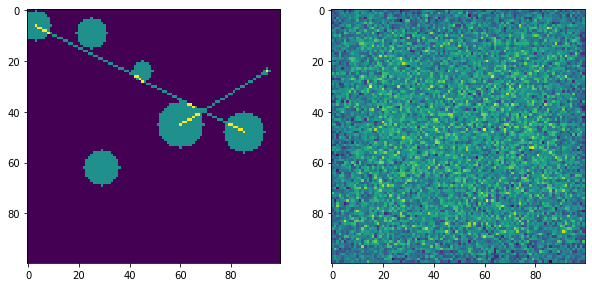

In [9]:
truth, obs = u.createTrainingPair(100, 40, 10)
fobs = np.zeros((1, 100*100))
fobs[0,:] = obs.flatten()
prediction = autoencoder.predict(fobs)
predictionR = prediction[0].reshape([100, 100])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(truth)
axes[1].imshow(predictionR)

In [23]:
dt = datetime.datetime.now().strftime("%d.%m.%Y-%H.%M.%S")
autoencoder.save(f"autoencoder_{dt}.h5")